## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata, study_results

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata,study_results ,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_results_df["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID = combined_results_df["Mouse ID"]
timepoint = combined_results_df["Timepoint"]

mice_timepoint_df = pd.DataFrame({"Mice ID": mouse_ID,
                              "Timepoint": timepoint
                               })
mice_timepoint_df

,Mice ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_rows_df = mice_timepoint_df[mice_timepoint_df.duplicated()]
duplicated_rows_df

,Mice ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# say_no_to_dupes = combined_results_df.drop_duplicates(subset=['Mouse ID'])
combined_results_df = combined_results_df[combined_results_df["Mouse ID"] != 'g989' ]


In [6]:
# Checking the number of mice in the clean DataFrame.
combined_results_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# 5 different lines for each stat then use pd.DataFrame to combine everything

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary = pd.DataFrame(combined_results_df.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"])
tumor_volume_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

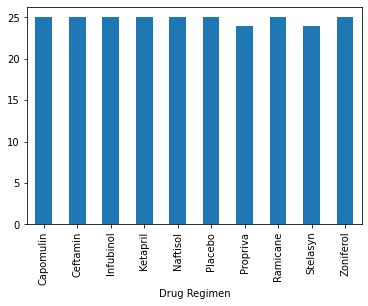

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# mice_tested = combined_results_df.groupby(["Drug Regimen"]).nunique()
mice_tested = combined_results_df.groupby(["Drug Regimen"]).nunique()
num_mice_tested = mice_tested["Mouse ID"]
num_mice_tested

num_mice_tested.plot.bar()
plt.show()

# num_mice_tested.plot.bar(x='Drug Regimen', y='val', rot=90)
# num_mice_tested
# x_axis = np.arange(len(num_mice_tested))
# tick_locations = [value+0.4 for value in x_axis]
# tick_locations = [value for value in x_axis]
# df.set_index("name",drop=True,inplace=True)
# plt.bar(x_axis, num_mice_tested, alpha=0.5, align="center")
# plt.xticks(tick_locations, mice_tested["Drug Regimen"], rotation="vertical")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

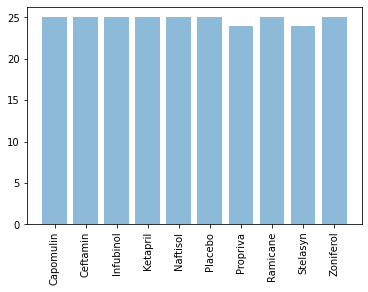

In [147]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


plt.bar(num_mice_tested.index.values, num_mice_tested, alpha=0.5, align="center")
plt.xticks(rotation = 90)


In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

combined_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
gender_df = combined_results_df.groupby(["Sex"]).nunique()
gender_distro = gender_df["Mouse ID"]
gender_distro

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

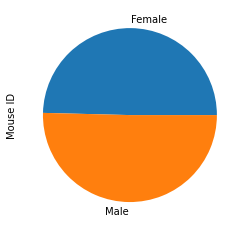

In [50]:
gender_distro.plot.pie()

([<matplotlib.patches.Wedge at 0x1bd503d3220>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

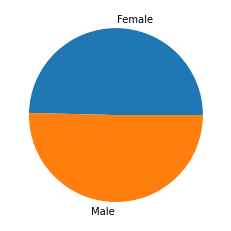

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_distro.values, labels = gender_distro.index.values)

## Quartiles, Outliers and Boxplots

In [185]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = combined_results_df.groupby(["Mouse ID"]).max()
max_timepoint_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'].isin(drug_regimen)]['Timepoint']
max_timepoint_df = max_timepoint_df.reset_index()  #this is done to make Mouse ID/timepoint columns, without this reset, Mouse ID is the index
max_timepoint_df
# max_timepoint_df = max_timepoint_df.isin(drug_regimen) --> this ran a boolean test on all data values
# max_timepoint_df
# tumor_volume_post = max_timepoint_df["Tumor Volume (mm3)"]
# tumor_volume_post

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [186]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# combined_results_df.append(max_timepoint_df, ignore_index = True)

merged_df = max_timepoint_df.merge(combined_results_df, on = ["Mouse ID", "Timepoint"])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [188]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = []

# Create empty list to fill with tumor vol data (for plotting)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 

for drug in drug_regimen:
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(drug)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")
    

Capomulin
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.



{'whiskers': [<matplotlib.lines.Line2D at 0x1bd50702df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd5070e4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd50702a90>,
 'medians': [<matplotlib.lines.Line2D at 0x1bd5070ebb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bd5070eeb0>,
 'means': []}

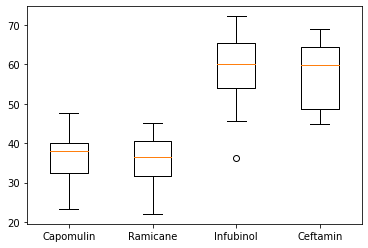

In [189]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol, labels = drug_regimen)

#there's an outlier under Infubinol

## Line and Scatter Plots

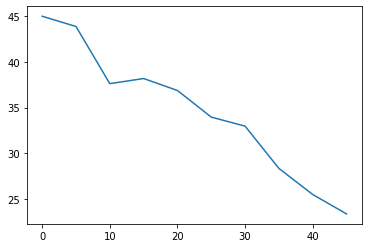

In [183]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_results = combined_results_df[combined_results_df["Drug Regimen"] == 'Capomulin']
mouse_ID_cap = capomulin_results.loc[capomulin_results["Mouse ID"] == 's185']
mouse_ID_cap = mouse_ID_cap.reset_index()

# mouse_ID_cap

plt.plot(mouse_ID_cap["Timepoint"],mouse_ID_cap["Tumor Volume (mm3)"])


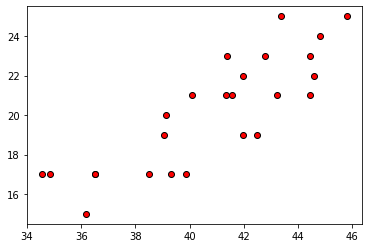

In [140]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin = capomulin_results.groupby(["Mouse ID"]).mean()
avg_tumor_volume_cap = avg_capomulin["Tumor Volume (mm3)"]
# avg_tumor_volume_cap

mouse_weight_cap = avg_capomulin["Weight (g)"]
# mouse_weight_cap

scatter_plot_df = pd.DataFrame({"Average Tumor Size":avg_tumor_volume_cap,
                             "Weight":mouse_weight_cap })

# scatter_plot_df

plt.scatter(avg_tumor_volume_cap, mouse_weight_cap, marker="o", facecolors="red", edgecolors="black")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
